In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from smatrix import get_TR
from helper import constant_refractive_index, set_layer

In [2]:
def graph_nk(w, n, k, title=''):
    plt.title(title)
    plt.plot(w, n, label='n')
    plt.plot(w, k, label='k')
    plt.legend()
    plt.xlim(w.min(), w.max())
    plt.ylabel('Refractive index')
    plt.xlabel('wavenumber (cm$^{-1}$)')
    
def graph_TR(w, T, R, title=''):
    plt.title(title)
    plt.plot(w, T, label='T')
    plt.plot(w, R, label='R')
    plt.legend()
    plt.xlim(w.min(), w.max())
    plt.ylim(-0.05, 1.05)
    plt.ylabel('Transmission / Reflection')
    plt.xlabel('wavenumber (cm$^{-1}$)')

## Example 1. Glass
https://refractiveindex.info/?shelf=3d&book=glass&page=BK7

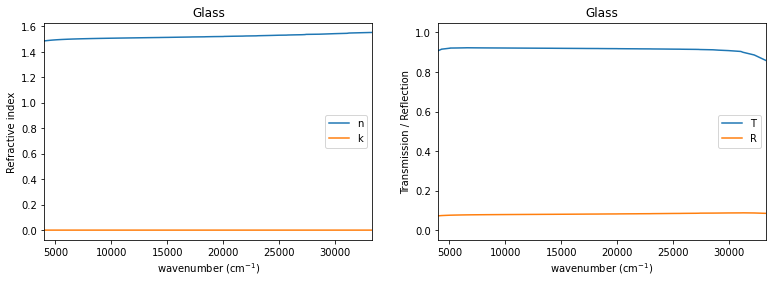

In [3]:
# Load Data
df = pd.read_csv('data/glass.csv').interpolate().dropna()
df['w'] = df['Photon energy, eV']*8065.5

w = df['w'].values
n = df['n'].values
k = df['k'].values

# Setup Layers
nk_vacuum = constant_refractive_index(1, w)
nk_glass  = n + 1j * k

layers = [set_layer(nk_vacuum, thickness=0.0,  coherence=True),
          set_layer(nk_glass,  thickness=0.05, coherence=False),
          set_layer(nk_vacuum, thickness=0.0,  coherence=True)]

# Incidence angle and polarization
incidence_angle = 0
polarization = 'p'

# Calculate T and R
TR = get_TR(layers, layers[0]['refractive_index'], incidence_angle, w, sp=polarization)
T = TR['T']
R = TR['R']

# Plot
plt.figure(figsize=(20, 4))
plt.subplot(131)
graph_nk(w, n, k, title='Glass')
plt.subplot(132)
graph_TR(w, T, R, title='Glass')
plt.show()

## Example 2. Water
https://refractiveindex.info/?shelf=3d&book=liquids&page=water

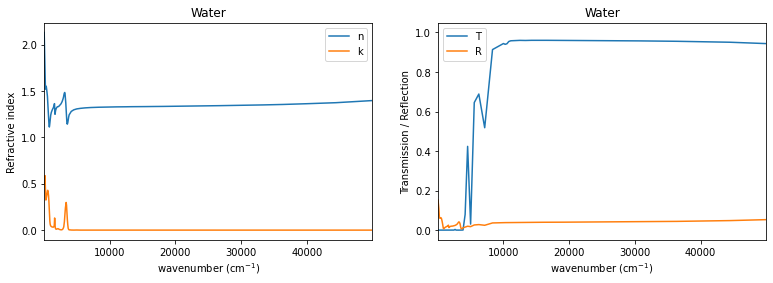

In [4]:
# Load Data
df = pd.read_csv('data/water.csv').interpolate().dropna()
df['w'] = df['Photon energy, eV']*8065.5

w = df['w'].values
n = df['n'].values
k = df['k'].values

# Setup Layers
nk_vacuum = constant_refractive_index(1, w)
nk_water  = n + 1j * k

layers = [set_layer(nk_vacuum, thickness=0.0,  coherence=True),
          set_layer(nk_water,  thickness=0.05, coherence=False),
          set_layer(nk_vacuum, thickness=0.0,  coherence=True)]

# Incidence angle and polarization
incidence_angle = 0
polarization = 's'

# Calculate T and R
TR = get_TR(layers, layers[0]['refractive_index'], incidence_angle, w, sp=polarization)
T = TR['T']
R = TR['R']

# Plot
plt.figure(figsize=(20, 4))
plt.subplot(131)
graph_nk(w, n, k, title='Water')
plt.subplot(132)
graph_TR(w, T, R, title='Water')
plt.show()

## Example 3. Silicon
https://refractiveindex.info/?shelf=main&book=Si&page=Green-2008

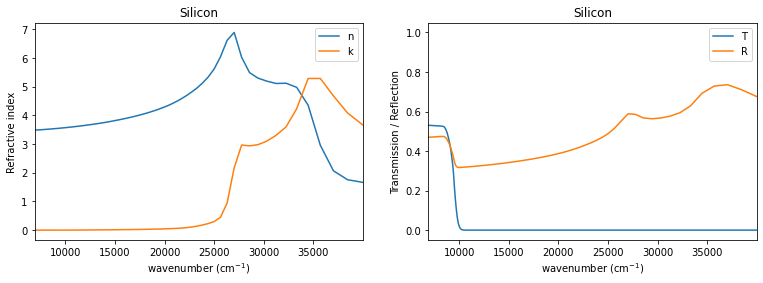

In [5]:
# Load Data
df = pd.read_csv('data/silicon.csv').interpolate().dropna()
df['w'] = df['Photon energy, eV']*8065.5

w = df['w'].values
n = df['n'].values
k = df['k'].values

# Setup Layers
nk_vacuum = constant_refractive_index(1, w)
nk_si     = n + 1j * k

layers = [set_layer(nk_vacuum, thickness=0.0,  coherence=True),
          set_layer(nk_si,     thickness=0.05, coherence=False),
          set_layer(nk_vacuum, thickness=0.0,  coherence=True)]

# Incidence angle and polarization
incidence_angle = 0
polarization = 's'

# Calculate T and R
TR = get_TR(layers, layers[0]['refractive_index'], incidence_angle, w, sp=polarization)
T = TR['T']
R = TR['R']

# Plot
plt.figure(figsize=(20, 4))
plt.subplot(131)
graph_nk(w, n, k, title='Silicon')
plt.subplot(132)
graph_TR(w, T, R, title='Silicon')
plt.show()

## Example 4. 300nm SiO2 on Silicon
Silicon: https://refractiveindex.info/?shelf=main&book=Si&page=Green-2008  
SiO2: https://refractiveindex.info/?shelf=main&book=SiO2&page=Lemarchand

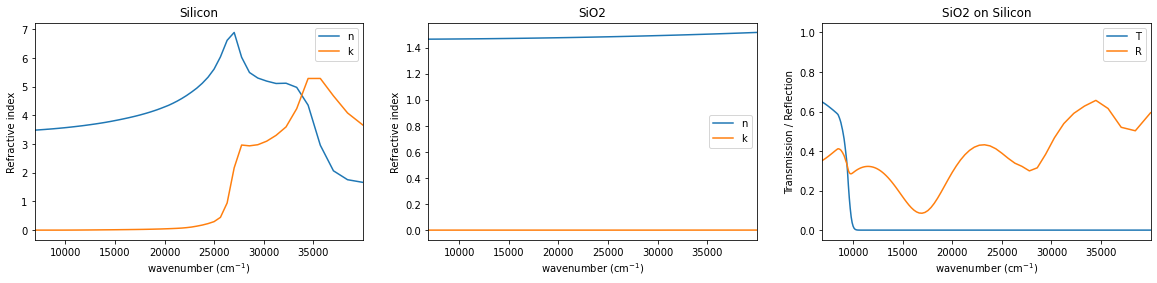

In [6]:
# Load Data
df_1 = pd.read_csv('data/silicon.csv')
df_2 = pd.read_csv('data/sio2.csv')
df = df_1.merge(df_2, left_on=['Photon energy, eV'], right_on=['Photon energy, eV']).interpolate().dropna()
df['w'] = df['Photon energy, eV']*8065.5

w = df['w'].values
n_si = df['n_x'].values
k_si = df['k_x'].values
n_sio2 = df['n_y'].values
k_sio2 = df['k_y'].values

# Setup Layers
nk_vacuum = constant_refractive_index(1, w)
nk_si     = n_si + 1j * k_si
nk_sio2   = n_sio2 + 1j * k_sio2

layers = [set_layer(nk_vacuum, thickness=0.0,  coherence=True),
          set_layer(nk_sio2,   thickness=3e-5, coherence=True),
          set_layer(nk_si,     thickness=0.05, coherence=False),
          set_layer(nk_vacuum, thickness=0.0,  coherence=True)]

# Incidence angle and polarization
incidence_angle = 0
polarization = 's'

# Calculate T and R
TR = get_TR(layers, layers[0]['refractive_index'], incidence_angle, w, sp=polarization)
T = TR['T']
R = TR['R']

# Plot
plt.figure(figsize=(20, 4))
plt.subplot(131)
graph_nk(w, n_si, k_si, title='Silicon')
plt.subplot(132)
graph_nk(w, n_sio2, k_sio2, title='SiO2')
plt.subplot(133)
graph_TR(w, T, R, title='SiO2 on Silicon')
plt.show()